# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

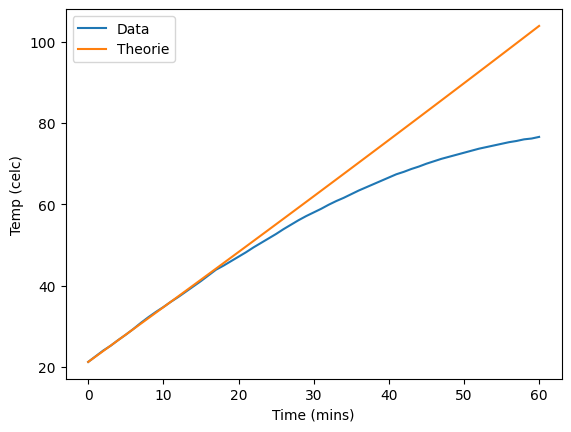

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(r'tempmetingen.csv', delimiter=';',skiprows=1)
d_time_min = data[:,0]
d_temp_c = data[:,1]

m_beker              = 0.8208 # kg

m_beker_water_start  = 1.2929 # kg
m_water_start = m_beker_water_start - m_beker

m_beker_water_eind   = 1.2749 # kg
m_water_eind = m_beker_water_eind - m_beker

p_time = 5 #min
# Verwachte p van het element: (gebruiken recht deel)
t_dT = d_temp_c[p_time]-d_temp_c[0] #Verandering temp 1e 5 minuten
t_dt = p_time*60                                         #Verandering tijd 1e 5 minuten (in seconden)
t_m = m_water_start     # Massa van het water
c_water = 4186          # Soortelijke warmte van water
c_beker = 860

Q = (t_m*c_water+c_beker*m_beker)* t_dT    # Q = m * c * dT
P = Q/t_dt                  # P = Q/t

T0 = d_temp_c[0]            # Start temperatuur
def T_verwacht(P,t,mass):
    return T0 + (P*t)/(mass*c_water+m_beker*c_beker)

punten = 120                # Aantal punten
dm_water = np.linspace(m_water_start, m_water_eind, 120)
time_array = np.linspace(0, 60, 120)*60

T_verwachtingen = []
for M in range(120):
    T_verwachtingen.append(T_verwacht(P, time_array[M],dm_water[M]))

plt.figure()
plt.plot(d_time_min,d_temp_c, label='Data')
plt.plot(time_array/60,T_verwachtingen, label='Theorie')

plt.xlabel('Time (mins)')
plt.ylabel('Temp (celc)')
plt.legend()
plt.show()



In [5]:
dT_tot = d_temp_c[-1]-d_temp_c[0]
dm = m_water_start-m_water_eind
lat_q = 2.26e6
c_beker = 840

Q_water = lat_q*dm + c_water*dm*(100-d_temp_c[0]) + c_water*m_water_eind*dT_tot
Q_toegevoegd  = P*d_time_min[-1]*60
Q_beker = dT_tot*c_beker*m_beker
Q_total = Q_water+Q_beker

print(f'Totale toegevoegde energie:     {Q_toegevoegd:.2e} J')
print(f'Energie opgenomen door systeem: {Q_total:.2e} J')
print(f'Energie opgenomen door water:   {Q_water:.2e} J')
print(f'Energie opgenomen door beker:   {Q_beker:.2e} J')


Totale toegevoegde energie:     2.16e+05 J
Energie opgenomen door systeem: 1.90e+05 J
Energie opgenomen door water:   1.52e+05 J
Energie opgenomen door beker:   3.82e+04 J


Bij de bovenstaande berekeningen gaan we er van uit dat de weerstand een constant vermogen geeft die gelijk is aan het gemiddelde door het water opgenomen vermogen over de eerste 5 min. We gaan er dus van uit dat het water in de eerste 5 min geen warmte verliest aan de omgeving en dat er geen water verdampt. Ook gaan we er van uit dat de potentiele en kinetische energie van het water verwaarloosbaar klein is en dat het water geen arbeid vericht. Voor het verdampte deel van het water gaan we er van uit dat het eerst opgewarmdt wordt tot 100c en dan verdampt.

Om dit experiment beter uit te voeren zou het water en de waterdamp zich in een afgeslote ruimte moeten bevinden die voor convectie, geleiding en radiatie geisoleerd is. In deze afgeslote ruimte moet dan de themperatuur en de druk gemeten worden om het thermodynamisch proces voledig te beschrijven. Verder is het ook van belang dat het vermogen van het verwarmingselement zo gelijk mogenlijk blijft. Aangezien er gebruik is gemaakt van een ohmse weerstand die zelf ook warm wordt en waarvan de weerstsand veranderd en dus het vermogen is dat bij het uitgevoerde experiment niet het geval. Ook is het van belang dat het verwarmingselement zelf zo min mogenlijk thermische massa heeft, dit geldt ook voor de thermokopel. Het zou nog beter zijn om andere manieren van verwarming te gebruiken, zoal microgolven of infrarood, al hebben die ieder hun eigen problemen.